<a href="https://colab.research.google.com/github/AbuNuurah/Ede-indigenous-man/blob/master/20_05_22_LSTM_GRU_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA

## ANALYSIS

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import GRU
from keras.layers import Dropout
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import time

Using TensorFlow backend.


In [ ]:
# 같은 결과를 나오게 하기 위해 seed 설정
np.random.seed(111)

### 데이터 불러오기

In [ ]:
import datetime
from datetime import date

In [ ]:
dataset = pd.read_csv(r'USDExchange.csv', encoding = 'EUC-KR')  

In [ ]:
index = dataset['Date']

In [ ]:
for i in range(len(index)):
    index[i] = datetime.datetime.strptime(index[i], "%Y.%m.%d").date()

C:\Users\K.N.W\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4004 non-null   object 
 1   Cost    4004 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.7+ KB


In [ ]:
dataset2 = dataset.set_index("Date")

In [ ]:
dataset2 = pd.DataFrame(dataset2["Cost"])

In [ ]:
dataset2

,Cost
Date,
2004-04-12,1141.8
2004-04-13,1141.1
2004-04-14,1151.3
2004-04-16,1160.1
2004-04-19,1153.6
...,...
2020-05-18,1234.5
2020-05-19,1226.0
2020-05-20,1229.0


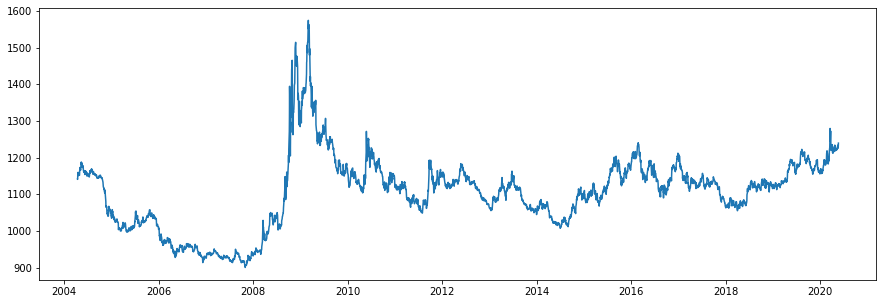

In [ ]:
# 원본 데이터 보기
plt.figure(figsize = (15, 5))
plt.plot(dataset2)
plt.show()

In [ ]:
# 필요한 부분만 불러오기
dataset = dataset.iloc[:, 1:2].values  

In [ ]:
dataset

array([[1141.8],
       [1141.1],
       [1151.3],
       ...,
       [1229. ],
       [1230.5],
       [1240. ]])

In [ ]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler을 통해 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
dataset

array([[-0.28488803],
       [-0.28696426],
       [-0.25671066],
       ...,
       [-0.02624944],
       [-0.02180039],
       [ 0.00637698]])

In [ ]:
data_df = pd.DataFrame(dataset, columns=['price'], index=index)
data_df.head()

,price
Date,
2004-04-12,-0.284888
2004-04-13,-0.286964
2004-04-14,-0.256711
2004-04-16,-0.230610
2004-04-19,-0.249889


### 데이터 분할

In [ ]:
row = int(round(dataset.shape[0] * 0.8))
train_df = data_df[:row]
test_df = data_df[row:]

In [ ]:
row

3203

In [ ]:
dataset

array([[-0.28488803],
       [-0.28696426],
       [-0.25671066],
       ...,
       [-0.02624944],
       [-0.02180039],
       [ 0.00637698]])

In [ ]:
#for s in range(1, 8):
#    train_df['shift_{}'.format(s)] = train_df['price'].shift(8-s)
#    test_df['shift_{}'.format(s)] = test_df['price'].shift(8-s)

#train_df.head(19)

In [ ]:
for s in range(1, 8):
    train_df['shift_{}'.format(s)] = train_df['price'].shift(s)
    test_df['shift_{}'.format(s)] = test_df['price'].shift(s)

train_df.head(19)

C:\Users\K.N.W\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\K.N.W\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,price,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7
Date,,,,,,,,
2004-04-12,-0.284888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-13,-0.286964,-0.284888,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-14,-0.256711,-0.286964,-0.284888,NaN,NaN,NaN,NaN,NaN
2004-04-16,-0.230610,-0.256711,-0.286964,-0.284888,NaN,NaN,NaN,NaN
2004-04-19,-0.249889,-0.230610,-0.256711,-0.286964,-0.284888,NaN,NaN,NaN
2004-04-20,-0.256414,-0.249889,-0.230610,-0.256711,-0.286964,-0.284888,NaN,NaN
2004-04-21,-0.246330,-0.256414,-0.249889,-0.230610,-0.256711,-0.286964,-0.284888,NaN
2004-04-22,-0.231796,-0.246330,-0.256414,-0.249889,-0.230610,-0.256711,-0.286964,-0.284888
2004-04-23,-0.235948,-0.231796,-0.246330,-0.256414,-0.249889,-0.230610,-0.256711,-0.286964


In [ ]:
X_train = train_df.dropna().drop('price', axis=1)
y_train = train_df.dropna()[['price']]

X_test = test_df.dropna().drop('price', axis=1)
y_test = test_df.dropna()[['price']]

In [ ]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7
Date,,,,,,,
2004-04-22,-0.246330,-0.256414,-0.249889,-0.230610,-0.256711,-0.286964,-0.284888
2004-04-23,-0.231796,-0.246330,-0.256414,-0.249889,-0.230610,-0.256711,-0.286964
2004-04-26,-0.235948,-0.231796,-0.246330,-0.256414,-0.249889,-0.230610,-0.256711
2004-04-27,-0.245736,-0.235948,-0.231796,-0.246330,-0.256414,-0.249889,-0.230610
2004-04-28,-0.254634,-0.245736,-0.235948,-0.231796,-0.246330,-0.256414,-0.249889


In [ ]:
len(X_train)

3196

In [ ]:
len(X_test)

794

In [ ]:
y_train.head()

,price
Date,
2004-04-22,-0.231796
2004-04-23,-0.235948
2004-04-26,-0.245736
2004-04-27,-0.254634
2004-04-28,-0.241584


In [ ]:
X_train_values = X_train.values
X_test_values= X_test.values

y_train_values = y_train.values
y_test_values = y_test.values

print(X_train_values.shape)
print(X_train_values)
print(y_train_values.shape)
print(y_train_values)

(3196, 7)
[[-0.24632953 -0.25641406 -0.24988877 ... -0.25671066 -0.28696426
  -0.28488803]
 [-0.23179594 -0.24632953 -0.25641406 ... -0.23060952 -0.25671066
  -0.28696426]
 [-0.23594839 -0.23179594 -0.24632953 ... -0.24988877 -0.23060952
  -0.25671066]
 ...
 [-0.26056651 -0.27836275 -0.27243067 ... -0.29615898 -0.26649859
  -0.27984577]
 [-0.25908349 -0.26056651 -0.27836275 ... -0.26649859 -0.29615898
  -0.26649859]
 [-0.29615898 -0.25908349 -0.26056651 ... -0.27243067 -0.26649859
  -0.29615898]]
(3196, 1)
[[-0.23179594]
 [-0.23594839]
 [-0.24573632]
 ...
 [-0.25908349]
 [-0.29615898]
 [-0.28726086]]


In [ ]:
X_train_t = X_train_values.reshape(X_train_values.shape[0], X_train_values.shape[1], 1)
X_test_t = X_test_values.reshape(X_test_values.shape[0], X_test_values.shape[1], 1)

print("최종 LSTM DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train_values)

최종 LSTM DATA
(3196, 7, 1)
[[[-0.24632953]
  [-0.25641406]
  [-0.24988877]
  ...
  [-0.25671066]
  [-0.28696426]
  [-0.28488803]]

 [[-0.23179594]
  [-0.24632953]
  [-0.25641406]
  ...
  [-0.23060952]
  [-0.25671066]
  [-0.28696426]]

 [[-0.23594839]
  [-0.23179594]
  [-0.24632953]
  ...
  [-0.24988877]
  [-0.23060952]
  [-0.25671066]]

 ...

 [[-0.26056651]
  [-0.27836275]
  [-0.27243067]
  ...
  [-0.29615898]
  [-0.26649859]
  [-0.27984577]]

 [[-0.25908349]
  [-0.26056651]
  [-0.27836275]
  ...
  [-0.26649859]
  [-0.29615898]
  [-0.26649859]]

 [[-0.29615898]
  [-0.25908349]
  [-0.26056651]
  ...
  [-0.27243067]
  [-0.26649859]
  [-0.29615898]]]
[[-0.23179594]
 [-0.23594839]
 [-0.24573632]
 ...
 [-0.25908349]
 [-0.29615898]
 [-0.28726086]]


## Adaboost-LSTM MODEL

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
def lstm_model():                                           
    # create model
    model = Sequential()
    #model.add(LSTM(256, return_sequences=False, input_shape=(7, 1)))
    #model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=False, input_shape=(7, 1)))
    model.add(Dropout(0.5))
    #model.add(LSTM(64, return_sequences=False))
    model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
lstm_model().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#예측기 만들기
ABL_estimator = KerasRegressor(build_fn = lstm_model, epochs=50, batch_size=30, verbose=1)

In [ ]:
boosted_lstm = AdaBoostRegressor(base_estimator= ABL_estimator, n_estimators=200, random_state=0) 

In [ ]:
#rescaled_train_X = X_train_t.reshape(X_train_t.shape[0],X_train_t.shape[1],1)

In [ ]:
#boosted_ann.fit(rescaled_train_X, y_train) #부사리선생님은 이거 사용

In [ ]:
boosted_lstm.fit(X_train_t, y_train)# scale your training data 

C:\Users\K.N.W\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/50
3196/3196 [==============================] - 3s 1ms/step - loss: 0.0246
Epoch 2/50
3196/3196 [==============================] - 1s 283us/step - loss: 0.0046
Epoch 3/50
3196/3196 [==============================] - 1s 268us/step - loss: 0.0041
Epoch 4/50
3196/3196 [==============================] - 1s 310us/step - loss: 0.0036
Epoch 5/50
3196/3196 [==============================] - 1s 429us/step - loss: 0.0029
Epoch 6/50
3196/3196 [==============================] - 1s 275us/step - loss: 0.0027
Epoch 7/50
3196/3196 [==============================] - 1s 260us/step - loss: 0.0026
Epoch 8/50
3196/3196 [==============================] - 1s 293us/step - loss: 0.0024
Epoch 9/50
3196/3196 [==============================] - 1s 326us/step - loss: 0.0024
Epoch 10/50
3196/3196 [==============================] - 1s 322us/step - loss: 0.0024
Epoch 11/50
3196/3196 [==============================] - 1s 292us/step - loss: 0.0022
Epoch 12/50
3196/3196 [==============================] - 1s 359us

3196/3196 [==============================] - 1s 254us/step - loss: 0.0068
Epoch 39/50
3196/3196 [==============================] - 1s 267us/step - loss: 0.0061
Epoch 40/50
3196/3196 [==============================] - 1s 267us/step - loss: 0.0059
Epoch 41/50
3196/3196 [==============================] - 1s 256us/step - loss: 0.0058
Epoch 42/50
3196/3196 [==============================] - 1s 274us/step - loss: 0.0057
Epoch 43/50
3196/3196 [==============================] - 1s 255us/step - loss: 0.0056
Epoch 44/50
3196/3196 [==============================] - 1s 274us/step - loss: 0.0056
Epoch 45/50
3196/3196 [==============================] - 1s 274us/step - loss: 0.0055
Epoch 46/50
3196/3196 [==============================] - 1s 308us/step - loss: 0.0056
Epoch 47/50
3196/3196 [==============================] - 1s 266us/step - loss: 0.0059
Epoch 48/50
3196/3196 [==============================] - 1s 254us/step - loss: 0.0055
Epoch 49/50
3196/3196 [==============================] - 1s 253us/

3196/3196 [==============================] - 1s 286us/step - loss: 0.0209
Epoch 25/50
3196/3196 [==============================] - 1s 349us/step - loss: 0.0206
Epoch 26/50
3196/3196 [==============================] - 1s 306us/step - loss: 0.0209
Epoch 27/50
3196/3196 [==============================] - 1s 316us/step - loss: 0.0212
Epoch 28/50
3196/3196 [==============================] - 1s 292us/step - loss: 0.0208
Epoch 29/50
3196/3196 [==============================] - 1s 340us/step - loss: 0.0203
Epoch 30/50
3196/3196 [==============================] - 1s 321us/step - loss: 0.0196
Epoch 31/50
3196/3196 [==============================] - 1s 274us/step - loss: 0.0185
Epoch 32/50
3196/3196 [==============================] - 1s 368us/step - loss: 0.0194
Epoch 33/50
3196/3196 [==============================] - 1s 342us/step - loss: 0.0177
Epoch 34/50
3196/3196 [==============================] - 1s 311us/step - loss: 0.0179
Epoch 35/50
3196/3196 [==============================] - 1s 364us/

3196/3196 [==============================] - 1s 303us/step - loss: 0.0275
Epoch 13/50
3196/3196 [==============================] - 1s 268us/step - loss: 0.0265
Epoch 14/50
3196/3196 [==============================] - 1s 285us/step - loss: 0.0265
Epoch 15/50
3196/3196 [==============================] - 1s 297us/step - loss: 0.0259
Epoch 16/50
3196/3196 [==============================] - 1s 270us/step - loss: 0.0260
Epoch 17/50
3196/3196 [==============================] - 1s 274us/step - loss: 0.0256
Epoch 18/50
3196/3196 [==============================] - 1s 299us/step - loss: 0.0253
Epoch 19/50
3196/3196 [==============================] - 1s 283us/step - loss: 0.0252
Epoch 20/50
3196/3196 [==============================] - 1s 276us/step - loss: 0.0246
Epoch 21/50
3196/3196 [==============================] - 1s 287us/step - loss: 0.0247
Epoch 22/50
3196/3196 [==============================] - 1s 278us/step - loss: 0.0243
Epoch 23/50
3196/3196 [==============================] - 1s 327us/

3196/3196 [==============================] - 1s 291us/step - loss: 0.0169
Epoch 50/50
3196/3196 [==============================] - 0s 117us/step
Epoch 1/50
3196/3196 [==============================] - 1s 427us/step - loss: 0.0522
Epoch 2/50
3196/3196 [==============================] - 1s 280us/step - loss: 0.0346
Epoch 3/50
3196/3196 [==============================] - 1s 308us/step - loss: 0.0339
Epoch 4/50
3196/3196 [==============================] - 1s 284us/step - loss: 0.0327
Epoch 5/50
3196/3196 [==============================] - 1s 324us/step - loss: 0.0325
Epoch 6/50
3196/3196 [==============================] - 1s 318us/step - loss: 0.0298
Epoch 7/50
3196/3196 [==============================] - 1s 275us/step - loss: 0.0286
Epoch 8/50
3196/3196 [==============================] - 1s 285us/step - loss: 0.0288
Epoch 9/50
3196/3196 [==============================] - 1s 308us/step - loss: 0.0276
Epoch 10/50
3196/3196 [==============================] - 1s 278us/step - loss: 0.0274
Epoc

3196/3196 [==============================] - 1s 304us/step - loss: 0.0240
Epoch 38/50
3196/3196 [==============================] - 1s 294us/step - loss: 0.0237
Epoch 39/50
3196/3196 [==============================] - 1s 330us/step - loss: 0.0230
Epoch 40/50
3196/3196 [==============================] - 1s 289us/step - loss: 0.0219
Epoch 41/50
3196/3196 [==============================] - 1s 299us/step - loss: 0.0225
Epoch 42/50
3196/3196 [==============================] - 1s 322us/step - loss: 0.0214
Epoch 43/50
3196/3196 [==============================] - 1s 305us/step - loss: 0.0196
Epoch 44/50
3196/3196 [==============================] - 1s 299us/step - loss: 0.0190
Epoch 45/50
3196/3196 [==============================] - 1s 320us/step - loss: 0.0174
Epoch 46/50
3196/3196 [==============================] - 1s 311us/step - loss: 0.0165
Epoch 47/50
3196/3196 [==============================] - 1s 311us/step - loss: 0.0157
Epoch 48/50
3196/3196 [==============================] - 1s 326us/

AdaBoostRegressor(base_estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x00000232AF527C88>,
                  learning_rate=1.0, loss='linear', n_estimators=200,
                  random_state=0)

In [ ]:
start = time.time()
y_pred = boosted_lstm.predict(X_test_t)
end = time.time()
total = end-start

print(total)

794/794 [==============================] - 0s 122us/step
1.6300687789916992


In [ ]:
y_pred = pd.DataFrame(y_pred, columns = ["price"], index = y_test.index)

In [ ]:
testPredict = scaler.inverse_transform(y_pred)
Ydata = scaler.inverse_transform(y_test)

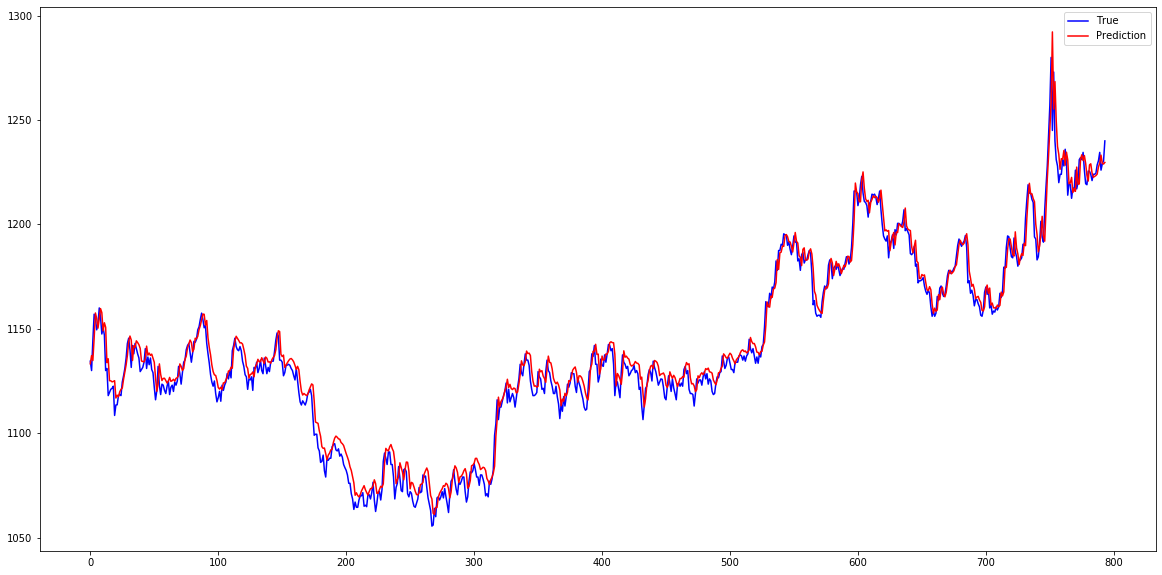

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(Ydata, label='True', color = 'Blue')
ax.plot(testPredict, label='Prediction', color='Red')
ax.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
mse = mean_squared_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
rmse = np.sqrt(mse)

In [ ]:
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  4.904666867964814
MSE:  41.81648319002889
RMSE:  6.466566568901065


# 일반 LSTM 모형

In [ ]:
model = Sequential()

model.add(LSTM(128, return_sequences=False, input_shape=(7, 1)))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
    
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = time.time()
model.fit(X_train_t, y_train, batch_size = 30, epochs = 50)
end = time.time()
total = end-start

print(total)

Epoch 1/50
3196/3196 [==============================] - 1s 433us/step - loss: 0.0274
Epoch 2/50
3196/3196 [==============================] - 1s 324us/step - loss: 0.0043
Epoch 3/50
3196/3196 [==============================] - 1s 313us/step - loss: 0.0041
Epoch 4/50
3196/3196 [==============================] - 1s 301us/step - loss: 0.0034
Epoch 5/50
3196/3196 [==============================] - 1s 322us/step - loss: 0.0030
Epoch 6/50
3196/3196 [==============================] - 1s 311us/step - loss: 0.0027
Epoch 7/50
3196/3196 [==============================] - 1s 299us/step - loss: 0.0027
Epoch 8/50
3196/3196 [==============================] - 1s 328us/step - loss: 0.0025
Epoch 9/50
3196/3196 [==============================] - 1s 290us/step - loss: 0.0026
Epoch 10/50
3196/3196 [==============================] - 1s 300us/step - loss: 0.0025
Epoch 11/50
3196/3196 [==============================] - 1s 311us/step - loss: 0.0025
Epoch 12/50
3196/3196 [==============================] - 1s 331

<function matplotlib.pyplot.show(*args, **kw)>

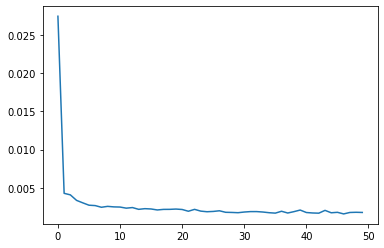

In [ ]:
plt.plot(model.history.history['loss'])
plt.show

In [ ]:
y_pred = model.predict(X_test_t)
y_pred = pd.DataFrame(y_pred, columns = ["price"], index = y_test.index)

In [ ]:
testPredict = scaler.inverse_transform(y_pred)
Ydata = scaler.inverse_transform(y_test)

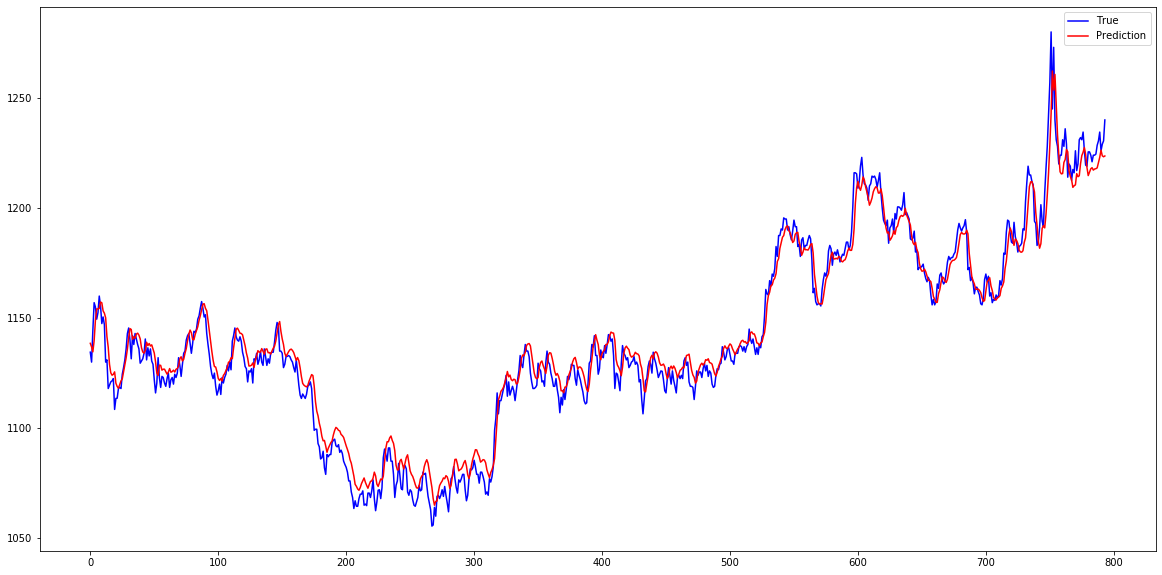

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(Ydata, label='True', color='Blue')
ax.plot(testPredict, label='Prediction', color='Red')
ax.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
mse = mean_squared_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
rmse = np.sqrt(mse)

In [ ]:
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  5.796761446936006
MSE:  55.318911868082346
RMSE:  7.437668443005667


## Adaboost-GRU MODEL

In [ ]:
def gru_model():                                           
    # create model
    model = Sequential()
    model.add(GRU(128, return_sequences=False, input_shape=(7, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
gru_model().summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               49920     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 50,049
Trainable params: 50,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#예측기 만들기
ABL_estimator = KerasRegressor(build_fn = gru_model, epochs=50, batch_size=30, verbose=1)

In [ ]:
boosted_gru = AdaBoostRegressor(base_estimator= ABL_estimator, n_estimators=200, random_state=0) #

In [ ]:
boosted_gru.fit(X_train_t, y_train)# scale your training data 

C:\Users\K.N.W\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/50
3196/3196 [==============================] - 2s 480us/step - loss: 0.0284
Epoch 2/50
3196/3196 [==============================] - 1s 312us/step - loss: 0.0046
Epoch 3/50
3196/3196 [==============================] - 1s 311us/step - loss: 0.0045
Epoch 4/50
3196/3196 [==============================] - 1s 321us/step - loss: 0.0043
Epoch 5/50
3196/3196 [==============================] - 1s 316us/step - loss: 0.0041
Epoch 6/50
3196/3196 [==============================] - 1s 304us/step - loss: 0.0037
Epoch 7/50
3196/3196 [==============================] - 1s 324us/step - loss: 0.0030
Epoch 8/50
3196/3196 [==============================] - 1s 324us/step - loss: 0.0028
Epoch 9/50
3196/3196 [==============================] - 1s 310us/step - loss: 0.0027
Epoch 10/50
3196/3196 [==============================] - 1s 332us/step - loss: 0.0026
Epoch 11/50
3196/3196 [==============================] - 1s 328us/step - loss: 0.0026
Epoch 12/50
3196/3196 [==============================] - 1s 303

3196/3196 [==============================] - 1s 289us/step - loss: 0.0060
Epoch 40/50
3196/3196 [==============================] - 1s 302us/step - loss: 0.0057
Epoch 41/50
3196/3196 [==============================] - 1s 292us/step - loss: 0.0058
Epoch 42/50
3196/3196 [==============================] - 1s 281us/step - loss: 0.0054
Epoch 43/50
3196/3196 [==============================] - 1s 304us/step - loss: 0.0051
Epoch 44/50
3196/3196 [==============================] - 1s 270us/step - loss: 0.0057
Epoch 45/50
3196/3196 [==============================] - 1s 282us/step - loss: 0.0052
Epoch 46/50
3196/3196 [==============================] - 1s 300us/step - loss: 0.0052
Epoch 47/50
3196/3196 [==============================] - 1s 290us/step - loss: 0.0048
Epoch 48/50
3196/3196 [==============================] - 1s 273us/step - loss: 0.0051
Epoch 49/50
3196/3196 [==============================] - 1s 293us/step - loss: 0.0049
Epoch 50/50
3196/3196 [==============================] - 0s 79us/s

3196/3196 [==============================] - 1s 292us/step - loss: 0.0133
Epoch 28/50
3196/3196 [==============================] - 1s 330us/step - loss: 0.0126
Epoch 29/50
3196/3196 [==============================] - 1s 296us/step - loss: 0.0126
Epoch 30/50
3196/3196 [==============================] - 1s 317us/step - loss: 0.0129
Epoch 31/50
3196/3196 [==============================] - 1s 328us/step - loss: 0.0122
Epoch 32/50
3196/3196 [==============================] - 1s 298us/step - loss: 0.0123
Epoch 33/50
3196/3196 [==============================] - 1s 326us/step - loss: 0.0114
Epoch 34/50
3196/3196 [==============================] - 1s 305us/step - loss: 0.0113
Epoch 35/50
3196/3196 [==============================] - 1s 303us/step - loss: 0.0118
Epoch 36/50
3196/3196 [==============================] - 1s 327us/step - loss: 0.0109
Epoch 37/50
3196/3196 [==============================] - 1s 315us/step - loss: 0.0108
Epoch 38/50
3196/3196 [==============================] - 1s 320us/

Epoch 21/50
3196/3196 [==============================] - 1s 301us/step - loss: 0.0165
Epoch 22/50
3196/3196 [==============================] - 1s 340us/step - loss: 0.0160
Epoch 23/50
3196/3196 [==============================] - 1s 346us/step - loss: 0.0162
Epoch 24/50
3196/3196 [==============================] - 1s 265us/step - loss: 0.0157
Epoch 25/50
3196/3196 [==============================] - 1s 305us/step - loss: 0.0151
Epoch 26/50
3196/3196 [==============================] - 1s 387us/step - loss: 0.0147
Epoch 27/50
3196/3196 [==============================] - 1s 346us/step - loss: 0.0149
Epoch 28/50
3196/3196 [==============================] - 1s 352us/step - loss: 0.0137
Epoch 29/50
3196/3196 [==============================] - 1s 392us/step - loss: 0.0134
Epoch 30/50
3196/3196 [==============================] - 1s 341us/step - loss: 0.0131
Epoch 31/50
3196/3196 [==============================] - 1s 296us/step - loss: 0.0134
Epoch 32/50
3196/3196 [==============================]

3196/3196 [==============================] - 1s 293us/step - loss: 0.0286
Epoch 16/50
3196/3196 [==============================] - 1s 349us/step - loss: 0.0273
Epoch 17/50
3196/3196 [==============================] - 1s 367us/step - loss: 0.0257 0s
Epoch 18/50
3196/3196 [==============================] - 1s 321us/step - loss: 0.0233
Epoch 19/50
3196/3196 [==============================] - 1s 328us/step - loss: 0.0218
Epoch 20/50
3196/3196 [==============================] - 1s 327us/step - loss: 0.0205
Epoch 21/50
3196/3196 [==============================] - 1s 396us/step - loss: 0.0209
Epoch 22/50
3196/3196 [==============================] - 1s 313us/step - loss: 0.0190
Epoch 23/50
3196/3196 [==============================] - 1s 361us/step - loss: 0.0180
Epoch 24/50
3196/3196 [==============================] - 1s 370us/step - loss: 0.0176
Epoch 25/50
3196/3196 [==============================] - 1s 402us/step - loss: 0.0175
Epoch 26/50
3196/3196 [==============================] - 1s 321

3196/3196 [==============================] - 1s 428us/step - loss: 0.0315
Epoch 3/50
3196/3196 [==============================] - 1s 397us/step - loss: 0.0298
Epoch 4/50
3196/3196 [==============================] - 1s 363us/step - loss: 0.0287
Epoch 5/50
3196/3196 [==============================] - 1s 367us/step - loss: 0.0281
Epoch 6/50
3196/3196 [==============================] - 1s 401us/step - loss: 0.0278
Epoch 7/50
3196/3196 [==============================] - 1s 342us/step - loss: 0.0278 0
Epoch 8/50
3196/3196 [==============================] - 1s 315us/step - loss: 0.0265
Epoch 9/50
3196/3196 [==============================] - 1s 390us/step - loss: 0.0265
Epoch 10/50
3196/3196 [==============================] - 1s 405us/step - loss: 0.0251
Epoch 11/50
3196/3196 [==============================] - 1s 398us/step - loss: 0.0253
Epoch 12/50
3196/3196 [==============================] - 1s 390us/step - loss: 0.0243
Epoch 13/50
3196/3196 [==============================] - 1s 341us/step 

3196/3196 [==============================] - 1s 329us/step - loss: 0.0173
Epoch 40/50
3196/3196 [==============================] - 1s 383us/step - loss: 0.0168
Epoch 41/50
3196/3196 [==============================] - 1s 316us/step - loss: 0.0166
Epoch 42/50
3196/3196 [==============================] - 1s 337us/step - loss: 0.0160
Epoch 43/50
3196/3196 [==============================] - 1s 323us/step - loss: 0.0159
Epoch 44/50
3196/3196 [==============================] - 1s 346us/step - loss: 0.0150
Epoch 45/50
3196/3196 [==============================] - 1s 339us/step - loss: 0.0149
Epoch 46/50
3196/3196 [==============================] - 1s 332us/step - loss: 0.0150
Epoch 47/50
3196/3196 [==============================] - 1s 340us/step - loss: 0.0141
Epoch 48/50
3196/3196 [==============================] - 1s 411us/step - loss: 0.0138
Epoch 49/50
3196/3196 [==============================] - 1s 359us/step - loss: 0.0139
Epoch 50/50
3196/3196 [==============================] - 0s 106us/

AdaBoostRegressor(base_estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000002333B67F8C8>,
                  learning_rate=1.0, loss='linear', n_estimators=200,
                  random_state=0)

In [ ]:
start = time.time()
y_pred = boosted_gru.predict(X_test_t)
end = time.time()
total = end-start

print(total)

794/794 [==============================] - 0s 63us/step
1.345231533050537


In [ ]:
y_pred = pd.DataFrame(y_pred, columns = ["price"], index = y_test.index)

In [ ]:
testPredict = scaler.inverse_transform(y_pred)
Ydata = scaler.inverse_transform(y_test)

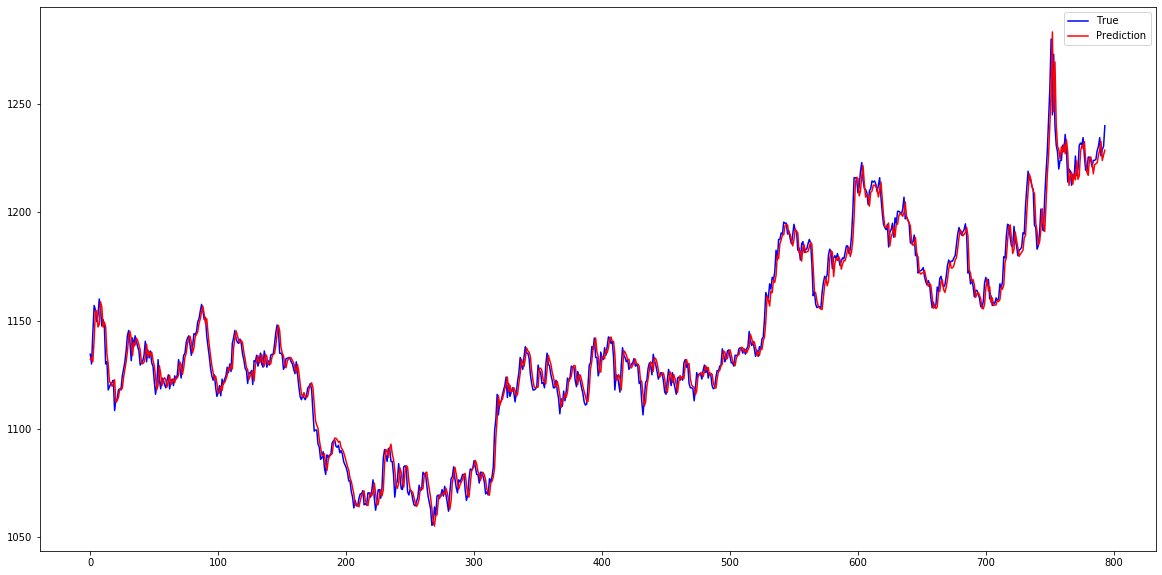

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(Ydata, label='True', color = 'Blue')
ax.plot(testPredict, label='Prediction', color='Red')
ax.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
mse = mean_squared_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
rmse = np.sqrt(mse)

In [ ]:
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  4.1780598138381615
MSE:  31.714978562104005
RMSE:  5.631605327267173


## 일반 GRU 모델

In [ ]:
model = Sequential()

model.add(GRU(128, return_sequences=False, input_shape=(7, 1)))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
    
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_21 (GRU)                 (None, 128)               49920     
_________________________________________________________________
dropout_43 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 129       
Total params: 50,049
Trainable params: 50,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = time.time()
model.fit(X_train_t, y_train, batch_size = 30, epochs = 50)
end = time.time()
total = end-start

print(total)

Epoch 1/50
3196/3196 [==============================] - 2s 542us/step - loss: 0.0216
Epoch 2/50
3196/3196 [==============================] - 1s 405us/step - loss: 0.0049
Epoch 3/50
3196/3196 [==============================] - 1s 358us/step - loss: 0.0046
Epoch 4/50
3196/3196 [==============================] - 1s 412us/step - loss: 0.0043
Epoch 5/50
3196/3196 [==============================] - 2s 473us/step - loss: 0.0041
Epoch 6/50
3196/3196 [==============================] - 1s 414us/step - loss: 0.0039
Epoch 7/50
3196/3196 [==============================] - 1s 379us/step - loss: 0.0033
Epoch 8/50
3196/3196 [==============================] - 1s 372us/step - loss: 0.0030
Epoch 9/50
3196/3196 [==============================] - 1s 401us/step - loss: 0.0027
Epoch 10/50
3196/3196 [==============================] - 1s 459us/step - loss: 0.0025
Epoch 11/50
3196/3196 [==============================] - 1s 461us/step - loss: 0.0026
Epoch 12/50
3196/3196 [==============================] - 1s 368

<function matplotlib.pyplot.show(*args, **kw)>

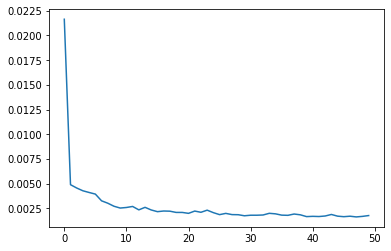

In [ ]:
plt.plot(model.history.history['loss'])
plt.show

In [ ]:
y_pred = model.predict(X_test_t)
y_pred = pd.DataFrame(y_pred, columns = ["price"], index = y_test.index)

In [ ]:
testPredict = scaler.inverse_transform(y_pred)
Ydata = scaler.inverse_transform(y_test)

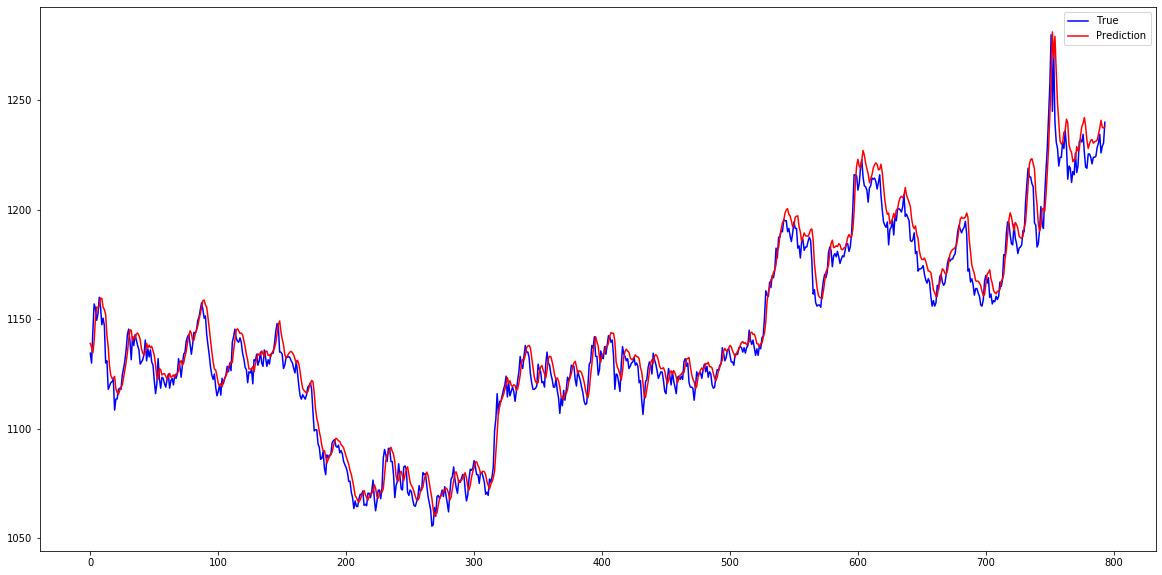

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(Ydata, label='True', color = 'Blue')
ax.plot(testPredict, label='Prediction', color='Red')
ax.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
mse = mean_squared_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
rmse = np.sqrt(mse)

In [ ]:
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  5.5336182563070695
MSE:  52.572733686789306
RMSE:  7.250705737153405
